In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 3: Table Manipulation and Visualization

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp25/reference/): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Reading**: 
* [Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 2/12 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/sp25/policies/) page. Turn it in by Tuesday, 2/11 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/sp25/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren). The office hours schedule appears on our [office hours page](https://www.data8.org/sp25/schedule/).

---

The point breakdown for this assignment is given in the table below:
| Category | Points |
| --- | --- |
| Autograder (Coding questions) | 69 |
| Written |31 |
| **Total** | 100 |

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Birth Rates

The following table gives Census-based population estimates for each US state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico and the District of Columbia.**

The data was taken from the [US Census Bureau](https://www.census.gov/).

The raw data is a bit messy—run the cell below to clean the table and make it easier to work with.

In [3]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


---

**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the total population size at the start of the time period. **(5 Points)**

_Hint:_ What does each row in the `pop` table represent? How can we use this to find the total US population?


In [4]:
us_birth_rate = sum(pop.column('BIRTHS')) / sum(pop.column('2015'))
us_birth_rate

0.012358536498646102

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

---

**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state. **(5 Points)**

*Hint*: `migration_rates` should be a table and `movers` should be a number.


In [6]:
migration_rates = pop.with_columns("Migration Rate", np.abs(pop.column("MIGRATION") / pop.column("2015")))
movers = np.count_nonzero(migration_rates.column("Migration Rate") > 0.01)
movers

9

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

---

**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). **(5 Points)**

*Hint:* Make sure you double check the type of the values in the `REGION` column and appropriately filter (i.e. the types must match!).


In [10]:
west_births = sum(pop.where("REGION", 4).column("BIRTHS"))
west_births

979657

In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

---

**Question 4.** In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between annual birth and death rates across multiple states in the United States?

1. Line Graph
2. Bar Chart
3. Scatter Plot

Assign `visualization` below to the number corresponding to the correct visualization. **(5 Points)**


In [12]:
visualization = 3

In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

--- 

**Question 5.** In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table containing the birth and death rates for each state. **(5 Points)**

Things to consider:

- What type of chart will help us illustrate an association between 2 variables?
- How can you manipulate a certain table to help generate your chart?
- Check out the [Recommended Reading](https://inferentialthinking.com/chapters/07/Visualization.html) for this homework!


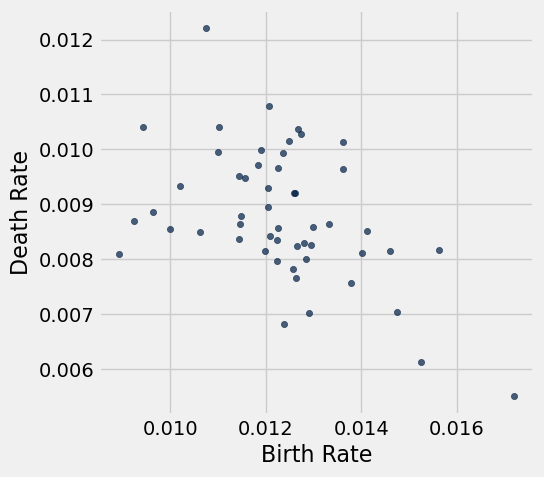

In [17]:
# In this cell, use birth_rates and death_rates to generate your visualization
birth_death_rates = pop.with_columns( "Birth Rate", pop.column('BIRTHS') / pop.column('2015'), "Death Rate", pop.column('DEATHS') / pop.column('2015'))
birth_death_rates.scatter("Birth Rate", "Death Rate")


<!-- END QUESTION -->

---

**Question 6.** True or False: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. **(5 Points)**


In [18]:
assoc = False

In [19]:
grader.check("q1_6")

q1_6 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Uber

**Note:** We recommend reading [Chapter 7.2](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) of the textbook before starting on Question 3.

Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://www.uber.com/newsroom/introducing-uber-movement-2/) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride in minutes.

In [24]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


<!-- BEGIN QUESTION -->

--- 

**Question 1.** Produce a histogram that visualizes the distributions of all ride times in Boston using the given bins in `equal_bins`. **(4 Points)**

*Hint:* See [Chapter 7.2](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) if you're stuck on how to specify bins.

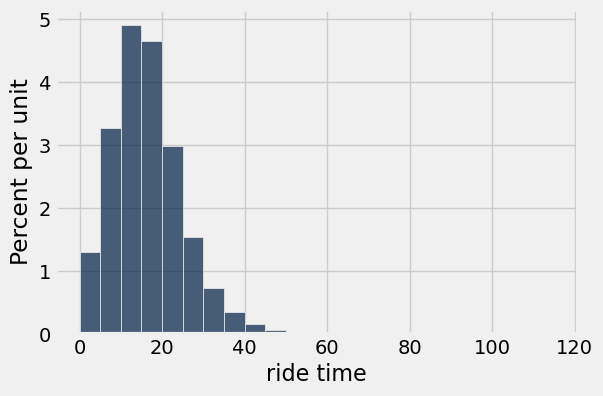

In [27]:
equal_bins = np.arange(0, 120, 5)
boston.hist("ride time", bins=equal_bins)  


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---

**Question 2.** Now, produce a histogram that visualizes the distribution of all ride times in Manila using the given bins. **(4 Points)**


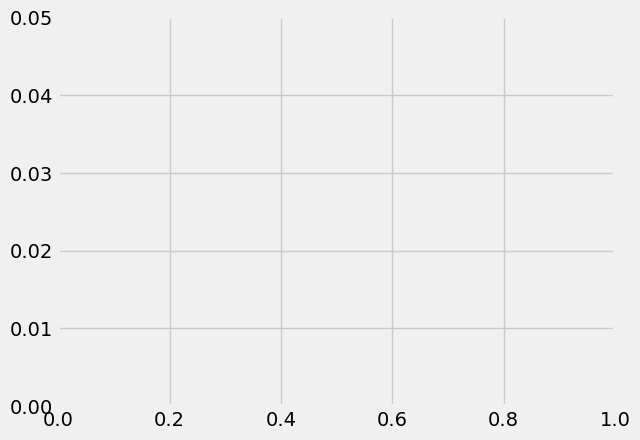

In [28]:
equal_bins = np.arange(0, 120, 5)
equal_bins_other = np.arange(0, max(boston.column("ride time")) + 5, 5)
# Don't delete the following line!
plt.ylim(0, 0.05);

<!-- END QUESTION -->

---

**Question 3.** Let's take a closer look at the y-axis label. Assign `unit_meaning` to an integer (1, 2, 3) that corresponds to the "unit" in "Percent per unit". **(4 Points)**

1. minute  
2. ride time  
3. second


In [29]:
unit_meaning = 1
unit_meaning

1

In [30]:
grader.check("q2_3")

q2_3 results: All test cases passed!

---

**Question 4.** Assign `boston_under_15` and `manila_under_15` to the percentage of rides that are less than 15 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should **not** access the tables `boston` and `manila` in any way. **(4 Points)**

> ***Note:*** that the height variables (i.e. `boston_under_5`) represent the height of the bin it describes.


In [31]:
boston_under_5_bin_height = 1.2
manila_under_5_bin_height = 0.6
boston_5_to_under_10_bin_height = 3.2
manila_5_to_under_10_bin_height = 1.4
boston_10_to_under_15_bin_height = 4.9
manila_10_to_under_15_bin_height = 2.2

boston_under_15 = 9.3
manila_under_15 = 4.2

boston_under_15, manila_under_15

(9.3, 4.2)

In [32]:
grader.check("q2_4")

q2_4 results: All test cases passed!

---

**Question 5.** Let's take a closer look at the distribution of ride times in Boston. Assign `boston_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time. **(4 Points)**

1. 0-8 minutes  
2. 8-14 minutes  
3. 14-20 minutes  
4. 20-40 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right.


In [33]:
boston_median_bin = 3
boston_median_bin

3

In [34]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 6.** Identify one difference between the histograms, in terms of the statistical properties. 
> *Hint*: Without performing any calculations, can you comment on the average or skew of each histogram? **(4 Points)**


Data appears to be right skewed, so more close to 15 minutes meaning the average ride duration is actually longer

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

--- 

**Question 7.** Why is your solution in Question 6 the case? Based on one of the following two readings, why are the distributions for Boston and Manila different? **(4 Points)**

- [Boston reading](https://www.climatestotravel.com/climate/united-states/boston)
- [Manila reading](https://web.archive.org/web/20240908154623/https://manilafyi.com/why-is-manila-traffic-so-bad/)

*Hint:* Try thinking about external factors of the two cities that may be causing the difference! The readings provide some potential factors -- try to connect them to the ride time data.


Based on intuition I think its due to external city-specific factors such as traffic congestion, infrastructure, and urban layout.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3. Histograms

Consider the following scatter plot: 

![Alt text](scatter.png "Scatter plot showing data points for the variables 'x' and 'y'. The data are symmetric about the x-axis centered at 0 and symmetric about the y-axis centered at 0, but with no data in the [-0.5, 0.5] range on the y-axis.")

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given three histograms—one corresponds to column `x`, one corresponds to column `y`, and one does not correspond to either column. 

**Histogram A:**
 
![Alt text](var3.png "Symmetrical, bell-shaped histogram centered around 0")

**Histogram B:**

![Alt text](var1.png "Symmetrical histogram with two peaks at -1 and 1 but no data around 0")

**Histogram C:**

![Alt text](var2.png "Asymmetrical histogram with a peak around -0.5 and a right skew")

---

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C


In [49]:
histogram_column_x = 1

In [50]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 2.** State at least one reason why you chose the histogram from Question 1. **Make sure to clearly indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**


I chose histogram A because of its standard bell shaped curve or in laymans terms an average depiction. Although, whats interesting is that you can submit different answers and get "passed". 

<!-- END QUESTION -->

---

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? Assign `histogram_column_y` to either 1, 2, or 3. **(5 Points)**

1. Histogram A
2. Histogram B
3. Histogram C


In [47]:
histogram_column_y = 2

In [51]:
grader.check("q3_3")

q3_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

---

**Question 4.** State at least one reason why you chose the histogram from Question 3.  **Make sure to clearly indicate which histogram you selected** (ex: "I chose histogram A because ..."). **(5 Points)**


I chose Histogram B because it shows a bimodal distribution, meaning the data has two distinct peaks around -1 and 1, with very few values around 0. It implies that var y has two dominant groups rather than a normal distribution 

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4. 2023 Cal Football Season

Jonathan and Jadyn are trying to analyze how well the Cal football team performed in the 2023 season. A football game is divided into four periods, called quarters. The number of points Cal scored in each quarter and the number of points their opponent scored in each quarter are stored in a table called `cal_fb.csv`.

In [52]:
# Just run this cell
# Read in the cal_fb csv file
games = Table().read_table("cal_fb.csv")
games.show()

Opponent,Cal 1Q,Cal 2Q,Cal 3Q,Cal 4Q,Opp 1Q,Opp 2Q,Opp 3Q,Opp 4Q
North Texas,14,19,15,10,7,14,0,0
Auburn,3,7,0,0,0,7,0,7
Idaho,0,14,14,3,10,7,0,0
Washington,6,6,7,13,24,21,7,7
Arizona State,7,3,7,7,7,0,6,8
Oregon State,0,17,15,8,7,14,14,17
Utah,7,0,7,0,0,14,10,10
USC,14,14,8,13,17,0,12,21
Oregon,10,3,6,0,14,21,7,21
Washington State,14,14,0,14,7,14,3,15


Let's start by finding the total points each team scored in a game.

---

**Question 1.** Write a function called `sum_scores`.  It should take four arguments, where each argument represents integers corresponding to the team's score for each quarter. It should return the team's total score for that game as an integer. **(2 Points)**

*Hint:* Don't overthink this question!



In [53]:
def sum_scores(x, y, z, a):
    '''Returns the total score calculated by adding up the score of each quarter'''
    return x + y + z + a

sum_scores(14, 7, 3, 0) #DO NOT CHANGE THIS LINE

24

In [54]:
grader.check("q4_1")

q4_1 results: All test cases passed!

---

**Question 2.** Create a new table `final_scores` with three columns in this *specific* order: `Opponent`, `Cal Score`, `Opponent Score`. You will have to create the `Cal Score` and `Opponent Score` columns. Use the function `sum_scores` you just defined in the previous question for this problem. **(5 Points)**

*Hint:* If you want to apply a function that takes in multiple arguments, you can pass multiple column names as arguments in `tbl.apply()`. The column values will be passed into the corresponding arguments of the function. Take a look at the [Python Reference](https://www.data8.org/sp25/reference/)  and Lecture 9's demo for syntax.

*Note:* If you’re running into issues creating `final_scores`, check that `cal_scores` and `opp_scores` output what you want. If you're encountering `TypeError`s, check the [Python Reference](https://www.data8.org/sp25/reference/) to see if the inputs/outputs of the function are what you expect.


In [55]:
cal_scores = games.apply(sum_scores, "Cal 1Q", "Cal 2Q", "Cal 3Q", "Cal 4Q")
opp_scores = games.apply(sum_scores, "Opp 1Q", "Opp 2Q", "Opp 3Q", "Opp 4Q")

final_scores = games.select("Opponent").with_columns("Cal Score", cal_scores, "Opponent Score", opp_scores)

final_scores

Opponent,Cal Score,Opponent Score
North Texas,58,21
Auburn,10,14
Idaho,31,17
Washington,32,59
Arizona State,24,21
Oregon State,40,52
Utah,14,34
USC,49,50
Oregon,19,63
Washington State,42,39


In [56]:
grader.check("q4_2")

q4_2 results: All test cases passed!

We can get specific row objects from a table. You can use `tbl.row(n)` to get the `n`th row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row. Here's an example:

In [57]:
# Just run this cell
# We got the Axe!
games.row(10) # <-- this will return a row object

Row(Opponent='Stanford', Cal 1Q=7, Cal 2Q=7, Cal 3Q=7, Cal 4Q=6, Opp 1Q=3, Opp 2Q=3, Opp 3Q=9, Opp 4Q=0)

In [58]:
# Just run this cell
games.row(10).item("Cal 4Q") # <-- this will return a item (e.g. an int) from a row object

6

---

**Question 3.** We want to see for a particular game whether or not Cal lost. Write a function called `did_cal_lose`.  It should take one argument: a **row object** from the `final_scores` table. It should return either `True` if Cal's score was less than the Opponent's score, and `False` otherwise. **(5 Points)**

*Note 1*: "Row object" means a row from the table extracted (behind the scenes) using `tbl.row(index)` that contains all the data for that specific row. It is **not** the index of a row. Do not try and call `final_scores.row(game_row)` inside of the function.

*Note 2*: If you're still confused by row objects, try printing out `final_scores.row(1)` in a new cell to visually see what it looks like! This piece of code is pulling out the row object located at index 1 of the `final_scores` table and returning it. When you display it in a cell, you'll see that it is not located within a table, but is instead a standalone row object!

Hint: You can use comparators like <, >, <=, >=, ==, and != to compare items from a row object


In [64]:
def did_cal_lose(game_row):
    return game_row[1] < game_row[2]

did_cal_lose(final_scores.row(1)) #DO NOT CHANGE THIS LINE

True

In [65]:
grader.check("q4_3")

q4_3 results: All test cases passed!

---

**Question 4.** Jonathan and Jadyn wants to see how Cal did against every opponent during the 2023 season. Using the `final_scores` table:

1. Assign `results_array` to an array of `True` and `False` boolean values that correspond to whether or not Cal lost.
2. Add `results_array` to the `final_scores` table in a column named `Results`, and assign this to `final_scores_with_results`.
3. Then, respectively assign the number of wins and losses Cal had to `cal_wins` and `cal_losses`.

**(10 Points)**

*Hint*: `tbl.apply()` might be helpful. Refer to the [Python Reference](https://www.data8.org/sp25/reference/) if you're unsure how it works!


In [66]:
results_array = final_scores.apply(did_cal_lose)
final_scores_with_results = final_scores.with_column("Results", results_array)
cal_losses = np.count_nonzero(results_array)
cal_wins = len(results_array) - cal_losses

# Don't delete or edit the following line:
print(f"In the 2023 Season, Cal Football won {cal_wins} games and lost {cal_losses} games. Go Bears! 🐻")

In the 2023 Season, Cal Football won 6 games and lost 7 games. Go Bears! 🐻


In [67]:
grader.check("q4_4")

q4_4 results: All test cases passed!

You're done with Homework 3!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final two cells**. 
3. Click the link to download the zip and pdf file.
4. Go to [Gradescope](https://www.gradescope.com) and submit the zip file to the corresponding assignment. The name of this assignment is "Homework 3 Autograder". 

**It is your responsibility to make sure your work is saved before running the last cell.**

## Pets of Data 8

**Mochi** wants to make sure you saved your notebook.

<img src="mochi.jpeg" width="40%" alt="Black cat with paw on computer"/>

Congrats on finishing Homework 3!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submision follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [79]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw03'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)